#### 数组
数组（Array）是一种线性表数据结构。它用一组连续的内存空间，来存储一组具有相同类型的数据。


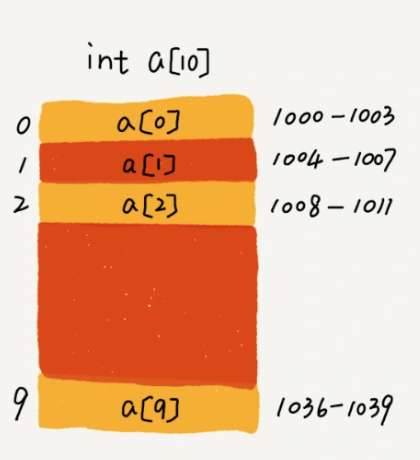

**a[i]_address = base_address + i * data_type_size**

##### 时间复杂度
1. 根据下标随机访问 O(1)
2. 排好序的二分查找 O(logn)
3. 插入 O(n) 或 O(1)
   1. 在k位置插入一个新的元素y
   2. 数据有序，必须搬移k之后的所有元素
      1. 插入a[1]，搬移n-1次；插入 a[n-1]，搬移1次；插入每个位置的可能性都有，综合时间复杂度 O(n)
   3. 数据无序，可以将原有的k放到最后，y放到k上，O(1) -> 快排的思路
4. 删除 O(n) 或 O(1)
   1. 和插入类似


##### ArrayList 和 Array 

1. 封装了很多数组操作的细节，数组增删的数据搬移
2. 支持动态扩容
    1. 数组本身在定义的时候需要预先指定大小，因为需要分配连续的内存空间。如果我们申请了大小为 10 的数组，当第 11 个数据需要存储到数组中时，我们就需要重新分配一块更大的空间，将原来的数据复制过去，然后再将新的数据插入。
    2. ArrayList 已经帮我们实现好了。每次存储空间不够的时候，它都会将空间自动扩容为 1.5 倍大小。
    3. 这里需要注意一点，因为扩容操作涉及内存申请和数据搬移，是比较耗时的。所以，如果事先能确定需要存储的数据大小，最好在创建 ArrayList 的时候事先指定数据大小。ArrayList users = new ArrayList(10000);
3. Java ArrayList 无法存储基本类型，比如 int、long，需要封装为 Integer、Long 类，而 Autoboxing、Unboxing 则有一定的性能消耗，所以如果特别关注性能，或者希望使用基本类型，就可以选用数组。
4. 如果数据大小事先已知，并且对数据的操作非常简单，用不到 ArrayList 提供的大部分方法，也可以直接使用数组。

对于业务开发，直接使用容器就足够了，省时省力。毕竟损耗一丢丢性能，完全不会影响到系统整体的性能。但如果你是做一些非常底层的开发，比如开发网络框架，性能的优化需要做到极致，这个时候数组就会优于容器，成为首选。

##### C 数组越界问题
```
int main(int argc, char* argv[]){
    int i = 0;
    int arr[3] = {0};
    for(; i<=3; i++){
        arr[i] = 0;
        printf("hello world\n");
    }
    return 0;
}
```

在C中，只要不是访问受限的内存，所有内存空间都是可以自由访问的</p>
根据数组寻址公式，a[3]会被定位到某块不属于数组的内存地址上，而这个地址正好是存储变量i的内存地址，那么 a[3]=0 -> i=0</p>
i一直内置0，导致了代码无限循环


**为什么a[3]访问到的内存地址是i的内存地址？**
函数体内局部变量存在栈上，且是连续压栈的。在Linux进程的内存布局上，栈区在高地址空间，**从高向低增长**（所以内存地址记的是高位）</p>
变量i和arr在相邻地址，且i比arr地址大，所以arr越界正好访问到i</p>
前提是i和arr元素同类型相同

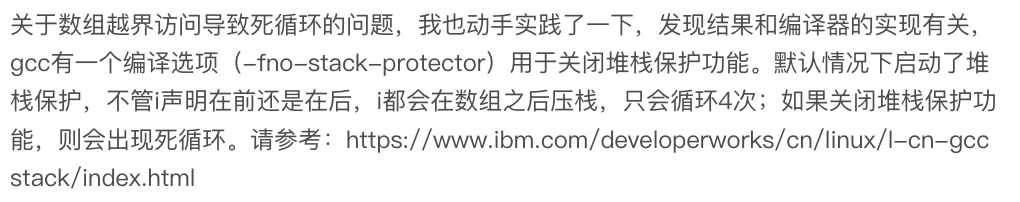
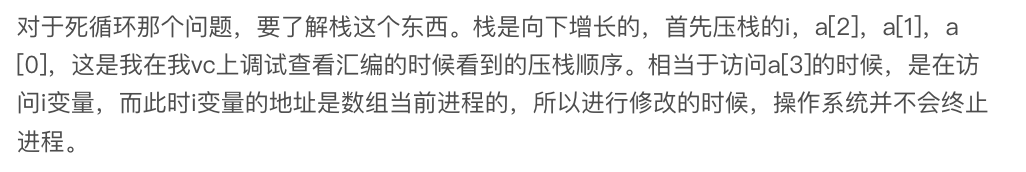

In [1]:
import sys

a = [1,2]
id1 = id(a[0])
id2 = id(a[1])
index_gap = id2-id1
value_sizeof = sys.getsizeof(a[0])
print(index_gap, value_sizeof) # 32, 28
print(index_gap == value_sizeof) # false

32 28
False


In [2]:
'''
leetcode easy
88. 合并两个递增的数组 nums1 和 nums2，数据量分别为 m 和 n，nums1的数组长度为 m+n
Input: nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
Output: [1,2,2,3,5,6]
'''

class Solution(object):
    def merge1(self, nums1: List[int], m:int, nums2:List[int], n:int) -> None:
        i = m - 1
        j = n - 1
        k = m + n - 1
        
        while j >= 0:
            if i >= 0 and nums1[i] > nums2[j]:
                nums1[k] = nums1[i]
                i -= 1
            else:
                nums1[k] = nums2[j]
                j -= 1
            k -= 1

    def merge2(self, nums1: List[int], m:int, nums2:List[int], n:int) -> None:
        for i in range(0,n):
            nums1[m+i] = nums2[i]
        nums1.sort()

NameError: name 'List' is not defined

In [ ]:
'''
leetcode easy
27 删除指定的val，并返回非val的数量
Input: nums = [3,2,2,3], val = 3
Output: 2, nums = [2,2,_,_]
Explanation: Your function should return k = 2, with the first two elements of nums being 2.
It does not matter what you leave beyond the returned k (hence they are underscores).
'''
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        i, j = 0, len(nums)-1
        while j >= i:
            if nums[i] == val:
                nums[i],nums[j] = nums[j],nums[i]
                j -= 1
            else:
                i += 1
        return i

        

In [ ]:
'''
leetcode  easy
26. Remove Duplicates from Sorted Array
Input: nums = [1,1,2]
Output: 2, nums = [1,2,_]
'''

from typing import List 

class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        j = 1
        for i in range(1, len(nums)):
            if nums[i] != nums[i-1]:
                nums[j] = nums[i] # 不是swap!!!是直接将后面不重复的值赋值到j上，i上的值仍是原来的值，所以不影响后续i迭代后的再判断
                j += 1
        return j 

s = Solution()
s.removeDuplicates([1,1,2,2])


2

In [ ]:
'''
leetcode medium
80. Remove Duplicates from Sorted Array II
Do not allocate extra space for another array. You must do this by modifying the input array in-place with O(1) extra memory.

Input: nums = [1,1,1,2,2,3]
Output: 5, nums = [1,1,2,2,3,_]

'''

class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        lens = len(nums)
        if lens < 3:
            return nums
        
        j  = 2

        for i in range(2, lens):
            if nums[i] != nums[j-2]:
                nums[j] = nums[i]
                j += 1

        return j


In [ ]:
'''
leetcode easy
169. Majority Element
Given an array nums of size n, return the majority element.

The majority element is the element that appears more than ⌊n / 2⌋ times. You may assume that the majority element always exists in the array.

Example 1:

Input: nums = [3,2,3]
Output: 3
Example 2:

Input: nums = [2,2,1,1,1,2,2]
Output: 2

'''

class Solution:
    def majorityElement(self, nums: List[int]) -> int:
        nums.sort()
        lens = len(nums)
        return nums[lens//2]
        

In [ ]:
'''
leetcode medium
189 Rotate Array

Given an integer array nums, rotate the array to the right by k steps, where k is non-negative.

Example 1:

Input: nums = [1,2,3,4,5,6,7], k = 3
Output: [5,6,7,1,2,3,4]
Explanation:
rotate 1 steps to the right: [7,1,2,3,4,5,6]
rotate 2 steps to the right: [6,7,1,2,3,4,5]
rotate 3 steps to the right: [5,6,7,1,2,3,4]
'''

from typing import List

class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        0~n-k-1: nums[i+k] = nums[i]
        n-k~n-1: nums[n-k + n-k] = nums[n-k]
        """
        if k == 0:
            return
        
        lens = len(nums)
        last_k_nums = nums[lens-k:lens]
        for i in range(lens-k-1, -1,-1):
            nums[i+k] = nums[i]

        for i in range(0, k):
            nums[i] = last_k_nums[i]

    # def rotate(self, nums: List[int], k: int) -> None:
    #     lens = len(nums)
    #     if k == 0 or not nums or lens == 1 or k == lens:
    #         return

    #     k = k%lens

    #     rotate_index = lens - k
    #     previous_rotate_index = 0

    #     while rotate_index > 0:
    #         previous_rotate_index = rotate_index -k
    #         if previous_rotate_index < 0:
    #             previous_rotate_index = 0
    #         for i in range(0,k):
    #             nums[previous_rotate_index+i], nums[rotate_index+i] = nums[rotate_index+i], nums[previous_rotate_index+i]

    #         rotate_index = previous_rotate_index


        
s = Solution()
nums = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
k = 38
s.rotate(nums, k)
print(nums)




[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
'''
leetcode medium
128

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
'''

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_profile = 0
        min_price = prices[0]

        for price in prices[1:]:
            min_price = min(min_price, price)
            max_profile = max(max_profile, price - min_price)
        
        return max_profile

        

In [ ]:

'''
leetcode 274 medium

Given an array of integers citations where citations[i] is the number of citations a researcher received for their ith paper, return the researcher's h-index.

According to the definition of h-index on Wikipedia: The h-index is defined as the maximum value of h such that the given researcher has published at least h papers that have each been cited at least h times.

如果一个学者有5篇论文，按照引用次数排序如下：

第1篇论文被引用了10次。
第2篇论文被引用了8次。
第3篇论文被引用了5次。
第4篇论文被引用了4次。
第5篇论文被引用了3次。
那么，这个学者的H指数为3，因为第3篇论文被引用了3次，且第4篇和第5篇的引用次数都小于它们的排名序号（4和5）。
'''
class Solution:
    def hIndex(self, citations: List[int]) -> int:
        n = len(citations)
        citations.sort(reverse=True)
        h_index = 0

        for i,v in enumerate(citations):
            if v <= i:
                break
            h_index += 1
        return h_index

In [ ]:
'''
leetcode medium
238 Product of Array Except self

Example 1:

Input: nums = [1,2,3,4]
Output: [24,12,8,6]
Example 2:

Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

'''

class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        lens = len(nums)
        result = [1] * lens

        pre, post = 1, 1

        for i in range(lens):
            result[i] *= pre # 乘以前面已经计算好的乘机
            result[lens-1-i] *= post # 乘以后面已经计算好的乘机

            pre *= nums[i]
            post *= nums[lens-1-i]

        return result

        

In [10]:
'''
leetcode medium
15 3Sum

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.

3 <= nums.length <= 3000
-105 <= nums[i] <= 105

'''

from typing import List

class Solution:

    def threeSum(self, nums: List[int]) -> List[List[int]]:
        negList, posList = [], []
        zeros = 0
        for v in nums:
            if v > 0:
                posList.append(v)
            elif v < 0:
                negList.append(v)
            else:
                zeros += 1

        negSet = set(negList)
        posSet = set(posList)

        valid_value = set()
        
        if zeros:
            if zeros >= 3:
                valid_value.add((0,0,0))

            for p in posSet:
                if -p in negSet:
                    valid_value.add((-p, 0, p))
            

        
        for i in range(0, len(posList)):
            for j in range(i+1, len(posList)):
                lost = 0 - posList[i] - posList[j]
                if lost in negSet:
                    valid_value.add(tuple(sorted([posList[i], posList[j], lost])))

        for i in range(0, len(negList)):
            for j in range(i+1, len(negList)):
                lost = -1*(negList[i] + negList[j])
                if lost in posSet:
                    valid_value.add(tuple(sorted([negList[i], negList[j], lost])))

        
        return valid_value
      
    
s = Solution()
nums = [-1,0,1,2,-1,-4]
v = s.threeSum(nums)
print(v)

{(-1, 0, 1)}


In [ ]:
'''
leetcode hard
41 first missing positive

Given an unsorted integer array nums. Return the smallest positive integer that is not present in nums.

You must implement an algorithm that runs in O(n) time and uses O(1) auxiliary space.

Example 1:

Input: nums = [1,2,0]
Output: 3
Explanation: The numbers in the range [1,2] are all in the array.
Example 2:

Input: nums = [3,4,-1,1]
Output: 2
Explanation: 1 is in the array but 2 is missing.
Example 3:

Input: nums = [7,8,9,11,12]
Output: 1
Explanation: The smallest positive integer 1 is missing.
 

Constraints:

1 <= nums.length <= 105
-231 <= nums[i] <= 231 - 1

'''

class Solution:
    def firstMissingPositive(self, nums: List[int]) -> int:
        # Function to swap elements in the array
        def swap(arr, i, j):
            arr[i], arr[j] = arr[j], arr[i]
        
        n = len(nums)
        
        # Place each positive integer i at index i-1 if possible
        # min of array > n  -> [7,8,9,11,12] -> [7,8,9,11,12]
        # min of array <= n -> [3,4,-1,1] -> [-1,4,3,1] -> [-1,1,3,4],[1,-1,3,4]
        # if res <= n, array 里必有不符的 index 的值
        # if res > n, array 里要么没有不符 index 的值 [0..n] -> n+1
        for i in range(n):
            while 0 < nums[i] <= n and nums[i] != nums[nums[i] - 1]:
                swap(nums, i, nums[i] - 1)
                # nums[i], nums[nums[i] - 1] = nums[nums[i] - 1], nums[i] 不能这样写，arr[i], arr[j] = arr[j], arr[i] 的index是确定的，nums[nums[i] - 1]的index不确定，会重新计算
        
        # Find the first missing positive integer
        for i in range(n):
            if nums[i] != i + 1:
                return i + 1
        
        # If all positive integers from 1 to n are present, return n + 1
        return n + 1